In [1]:
import sympy as sp
x = sp.Symbol('x')
%whos

Variable   Type      Data/Info
------------------------------
sp         module    <module 'sympy' from 'C:\<...>ges\\sympy\\__init__.py'>
x          Symbol    x


In [3]:
import sympy as sp

n = 3
a = [ sp.symbols( 'a%d' % i ) for i in range(n)]
sp.pprint(a)

[a₀, a₁, a₂]


In [4]:
import sympy as sp
from sympy.abc import x,y,z,alpha, beta

sp.pprint(alpha*x**2 + 2*x*y - 3*beta*z - z**2)

   2                    2
α⋅x  - 3⋅β⋅z + 2⋅x⋅y - z 


In [5]:
import sympy as sp
from sympy.abc import pi
sp.pprint(sp.sin(pi))
print(    sp.sin(sp.pi))

sin(π)
0


In [13]:
import sympy as sp
import numpy as np
a = np.array([ sp.sin( (sp.pi * k) / 2) for k in range(11)])
b = np.array([ np.sin( (np.pi * k) / 2) for k in range(11)])
c = a == b
for i in range(11):
    print('sp value:', a[i], " np value:", b[i])
    print(a[i] == b[i])

sp value: 0  np value: 0.0
True
sp value: 1  np value: 1.0
True
sp value: 0  np value: 1.2246467991473532e-16
False
sp value: -1  np value: -1.0
True
sp value: 0  np value: -2.4492935982947064e-16
False
sp value: 1  np value: 1.0
True
sp value: 0  np value: 3.6739403974420594e-16
False
sp value: -1  np value: -1.0
True
sp value: 0  np value: -4.898587196589413e-16
False
sp value: 1  np value: 1.0
True
sp value: 0  np value: 6.123233995736766e-16
False


In [14]:
# Упрощение символьных выражений
import sympy as sp
from sympy.abc import x,y 
v = sp.sin(x)**2 + sp.cos(x)**2
sp.pprint(v)
print('\nAfter simplify =', str(sp.simplify(v)))

   2         2   
sin (x) + cos (x)

After simplify = 1


In [18]:
# УПРАЖНЕНИЕ 3
v = (x**7 +3*x**2 - 4)/(x-1)
sp.pprint(v)
print(str(sp.simplify(sp.factor(v))))

 7      2    
x  + 3⋅x  - 4
─────────────
    x - 1    
x**6 + x**5 + x**4 + x**3 + x**2 + 4*x + 4


In [19]:
# УПРАЖНЕНИЕ 4
a = x**4 + 4
print(sp.factor(a))
b = x**7 + 1
print(sp.factor(b))
c = 2*x**3 + y*x**2 - 5*x*y**2 + 2*y**3
print(sp.factor(c))

(x**2 - 2*x + 2)*(x**2 + 2*x + 2)
(x + 1)*(x**6 - x**5 + x**4 - x**3 + x**2 - x + 1)
(x - y)*(x + 2*y)*(2*x - y)


In [20]:
# РЕШЕНИЕ НЕРАВЕНСТВ
a = sp.solve_univariate_inequality(x**2>=4,x)
sp.pprint(a)

(2 ≤ x ∧ x < ∞) ∨ (x ≤ -2 ∧ -∞ < x)


In [92]:
# РЕШЕНИЕ СИСТЕМЫ НЕРАВЕНСТВ
a = sp.solve_univariate_inequality(x**2 >= 6, x, relational=False)
b = sp.solve_univariate_inequality(x**2 <= 9, x, relational=False)
c = sp.Intersection(a,b)
sp.pprint(c)
sp.pprint(a)

[-3, -√6] ∪ [√6, 3]
(-∞, -√6] ∪ [√6, ∞)


In [95]:
import sympy as sp
from sympy.abc import x
a = sp.solve_univariate_inequality(sp.Abs(x**2-3)>3,x, relational=False)
sp.N(a,4)

(-∞, -√6) ∪ (√6, ∞)


Union(Interval.open(-oo, -2.449), Interval.open(2.449, oo))

In [61]:
import sympy as sp
from sympy.abc import x
b = sp.solve_univariate_inequality( x**3 + 3*x > 3, x, relational = False)
sp.N(b,5)

Interval.open(0.81773, oo)

In [100]:
# ПРИМЕР 5
import sympy as sp
from sympy.abc import n

a = sp.solve_univariate_inequality( sp.Abs( ( (n**3 + 3*n + 10) / 
            (2*n**3 - 2*n + 5)) - 1/2) < 0.001, n, relational = False)
b = sp.solve_univariate_inequality( n > 0, n, relational=False)

sp.Intersection(a,b) # => n_0 = 45

Interval.open(45.6410785465307, oo)

In [62]:
%reset

1/2


C:\Users\8230989\AppData\Local\Temp\ipykernel_5960\1224896205.py:12: RuntimeWarning: divide by zero encountered in divide
  x_n = (n**3 - 1)/(2*n**3 + 2*n)


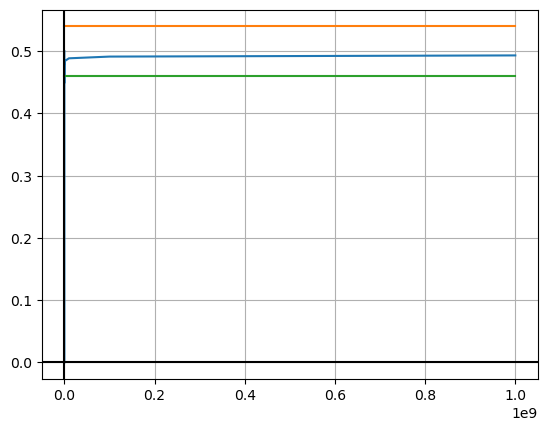

n(0.01) = 7
n(0.001) = 22


In [70]:
# УПРАЖНЕНИЕ 6
import sympy as sp
from sympy.abc import n, a, epsilon
import numpy as np
import matplotlib.pyplot as plt

y1 = np.arange(-2,10,1)
z1 = np.ones((1,12))*10 # Array like [10, 10, 10 ...]
x1 = np.power(z1,y1)
n = np.arange(-2,10,1)

x_n = (n**3 - 1)/(2*n**3 + 2*n)
a = sp.limit(x_n,n, 0)

n = sp.symbols('n')
expr = ( (1/n)**3 - 1) / ( 2*(1/n)**3 + 2*(1/n))
a = sp.limit(expr, n, 0)
print(a)

@np.vectorize
def const_a(x):
    return a

plt.plot(x1[0], x_n)
x = np.linspace(0.01,10**9,1000)
plt.plot(x, const_a(x) + 0.04)
plt.plot(x, const_a(x) - 0.04)
plt.grid()
plt.axhline(y = 0, color = 'k')
plt.axvline(x = 0, color = 'k')
plt.show()

e1 = sp.solve_univariate_inequality(sp.Abs(
    ( n**3 - 1) / ( 2*n**3 + 2*n) - a) 
        < 0.01, n, relational=False)
e2 = sp.solve_univariate_inequality(n > 0, n, relational=False)
sp.Intersection(e1,e2)
print('n(0.01) = 7')

e1 = sp.solve_univariate_inequality(sp.Abs(
    ( n**3 - 1) / ( 2*n**3 + 2*n) - a) 
        < 0.001, n, relational=False)
e2 = sp.solve_univariate_inequality(n > 0, n, relational=False)
sp.Intersection(e1,e2)
print('n(0.001) = 22')


[-0.36363636 -1.          0.          1.          0.36363636  0.20245399
  0.14035088  0.10791367  0.08792904  0.07432854  0.06444526  0.05692296]
0


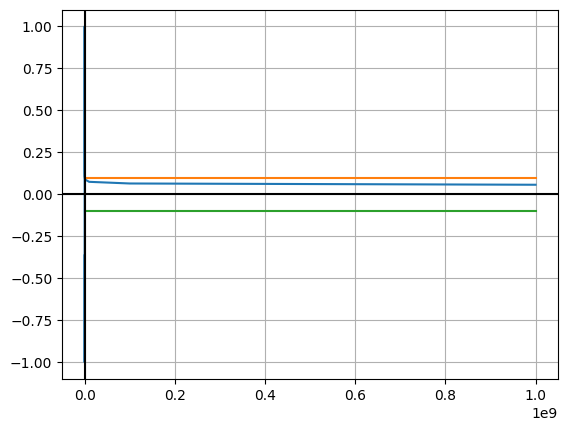

n(0.01) = 50
n(0.001) = 500


In [63]:

import sympy as sp
from sympy.abc import n, a, epsilon
import numpy as np
import matplotlib.pyplot as plt

y1 = np.arange(-2,10,1)
z1 = np.ones((1,12))*10 # Array like [10, 10, 10 ...]
x1 = np.power(z1,y1)

n = np.arange(-2,10,1)

x_n = (n**3 + 2*n)/(2*n**4 + 1)
print(x_n)
a = sp.limit(x_n,n, 0)
n = sp.symbols('n')
expr = ( (1/n)**3 + 2*(1/n)) / ( 2*(1/n)**4 + 1)
a = sp.limit(expr, n, 0)
print(a)

@np.vectorize
def const_a(x):
    return a

plt.plot(x1[0], x_n)
x = np.linspace(0.01,10**9,1000)
plt.plot(x, const_a(x) + 0.1)
plt.plot(x, const_a(x) - 0.1)
plt.grid()
plt.axhline(y = 0, color = 'k')
plt.axvline(x = 0, color = 'k')
plt.show()

e1 = sp.solve_univariate_inequality(sp.Abs(
    ((n)**3 + 2*(n)) / ( 2*(n)**4 + 1) - a) 
        < 0.01, n, relational=False)
e2 = sp.solve_univariate_inequality(n > 0, n, relational=False)
sp.Intersection(e1,e2)
print('n(0.01) = 50')

e1 = sp.solve_univariate_inequality(sp.Abs(
    ((n)**3 + 2*(n)) / ( 2*(n)**4 + 1) - a) 
        < 0.001, n, relational=False)
e2 = sp.solve_univariate_inequality(n > 0, n, relational=False)
sp.Intersection(e1,e2)
print('n(0.001) = 500')

In [68]:
x = sp.symbols('x')
expr = (1/x)**2 / (2*(1/x)**2)
print( sp.limit(expr, x, 0))

1/2


In [50]:
# УПРАЖНЕНИЕ С1
import sympy as sp
from sympy.abc import x
b = sp.solve_univariate_inequality( x**3 - 3*x > -1.0, x, True)
sp.pprint(b)

(-1.87938524157182 < x ∧ x < 0.347296355333861) ∨ (1.53208888623796 < x ∧ x < 
∞)


2


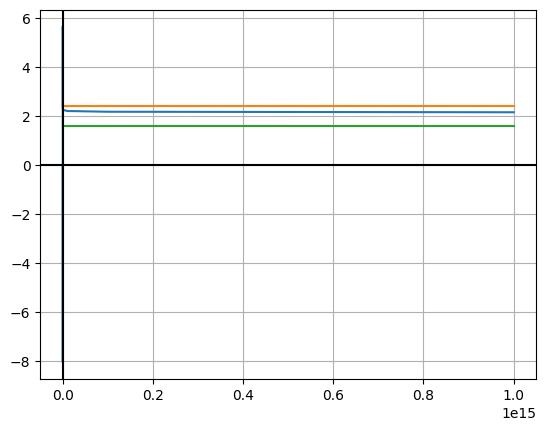

n(0.01) = 200
n(0.001) = 2000


In [1]:
# УПРАЖНЕНИЕ С2
import sympy as sp
from sympy.abc import n, a, epsilon
from sympy import oo
import numpy as np
import matplotlib.pyplot as plt
# a)
y1 = np.arange(2,16,1)
z1 = np.ones((1,14))*10 # Array like [10, 10, 10 ...]
x1 = np.power(z1,y1)
n = np.arange(2,16,1)
x_n = (2*n**5 + 2*n**4 + 3) / (n**5 - 5*n - 10_000)

n = sp.symbols('n')
expr = (2*n**5 + 2*n**4 + 3) / (n**5 - 5*n - 10_000)
a = sp.limit(expr, n, oo)
print(a)

@np.vectorize
def const_a(x):
    return a

plt.plot(x1[0], x_n)
x = np.linspace(0.01,10**15,1000)
plt.plot(x, const_a(x) + 0.4)
plt.plot(x, const_a(x) - 0.4)
plt.grid()
plt.axhline(y = 0, color = 'k')
plt.axvline(x = 0, color = 'k')
plt.show()

e1 = sp.solve_univariate_inequality(sp.Abs(
    (2*n**5 + 2*n**4 + 3) / (n**5 - 5*n - 10_000) - a) 
        < 0.01, n, relational=False)
e2 = sp.solve_univariate_inequality(n > 0, n, relational=False)
sp.Intersection(e1,e2)
print('n(0.01) = 200')

e1 = sp.solve_univariate_inequality(sp.Abs(
    (2*n**5 + 2*n**4 + 3) / (n**5 - 5*n - 10_000) - a) 
        < 0.001, n, relational=False)
e2 = sp.solve_univariate_inequality(n > 0, n, relational=False)
sp.Intersection(e1,e2)
print('n(0.001) = 2000')

sqrt(2)


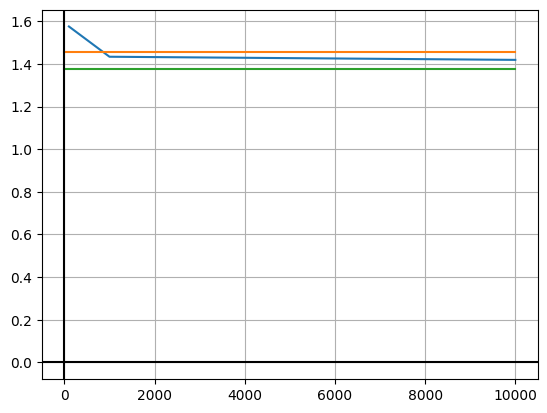

n(0.01) = 3
n(0.001) = 5


In [31]:
# б)
y1 = np.arange(2,5,1)
z1 = np.ones((1,3))*10 # Array like [10, 10, 10 ...]
x1 = np.power(z1,y1)
n = np.arange(2,5,1)
x_n = np.sqrt(2*n**5 + 3) / np.sqrt(n**5 - 5)

n = sp.symbols('n')
expr = sp.sqrt(2*n**5 + 3) / sp.sqrt(n**5 - 5)
a = sp.limit(expr, n, oo)
print(a)

@np.vectorize
def const_a(x):
    return a

plt.plot(x1[0], x_n)
x = np.linspace(0.01,10**4,1000)
plt.plot(x, const_a(x) + 0.04)
plt.plot(x, const_a(x) - 0.04)
plt.grid()
plt.axhline(y = 0, color = 'k')
plt.axvline(x = 0, color = 'k')
plt.show()

e1 = sp.solve_univariate_inequality(sp.Abs(
    sp.sqrt(2*n**5 + 3) / sp.sqrt(n**5 - 5) - a) 
        < 0.01, n, relational=False)
e2 = sp.solve_univariate_inequality(n > 0, n, relational=False)
sp.Intersection(e1,e2)
print('n(0.01) = 3')

e1 = sp.solve_univariate_inequality(sp.Abs(
    sp.sqrt(2*n**5 + 3) / sp.sqrt(n**5 - 5) - a) 
        < 0.001, n, relational=False)
e2 = sp.solve_univariate_inequality(n > 0, n, relational=False)
sp.Intersection(e1,e2)
print('n(0.001) = 5')

2/3


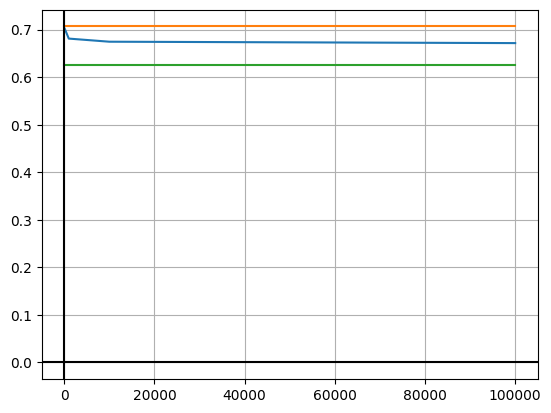

"\ne1 = sp.solve_univariate_inequality(sp.Abs(\n    sp.cbrt(n**3 + n**2) - sp.cbrt(n**3 - n**2) - a) \n        < 0.01, n, True)\ne2 = sp.solve_univariate_inequality(n > 0, n, True)\nsp.Intersection(e1,e2)\nprint('n(0.01) = vvv')\n\ne1 = sp.solve_univariate_inequality(sp.Abs(\n    sp.cbrt(n**3 + n**2) - sp.cbrt(n**3 - n**2) - a) \n        < 0.001, n, relational=False)\ne2 = sp.solve_univariate_inequality(n > 0, n, relational=False)\nsp.Intersection(e1,e2)\nprint('n(0.001) = vvv')\n"

In [51]:
# в)
y1 = np.arange(2,6,1)
z1 = np.ones((1,4))*10 # Array like [10, 10, 10 ...]
x1 = np.power(z1,y1)
n = np.arange(2,6,1)
x_n = (n**3 + n**2)**(1/3) - (n**3 - n**2)**(1/3)

n = sp.symbols('n')
expr = sp.cbrt(n**3 + n**2) - sp.cbrt(n**3 - n**2)
a = sp.limit(expr, n, oo)
print(a)

@np.vectorize
def const_a(x):
    return a

plt.plot(x1[0], x_n)
x = np.linspace(0.01,10**5,1000)
plt.plot(x, const_a(x) + 0.04)
plt.plot(x, const_a(x) - 0.04)
plt.grid()
plt.axhline(y = 0, color = 'k')
plt.axvline(x = 0, color = 'k')
plt.show()
'''
e1 = sp.solve_univariate_inequality(sp.Abs(
    sp.cbrt(n**3 + n**2) - sp.cbrt(n**3 - n**2) - a) 
        < 0.01, n, True)
e2 = sp.solve_univariate_inequality(n > 0, n, True)
sp.Intersection(e1,e2)
print('n(0.01) = vvv')

e1 = sp.solve_univariate_inequality(sp.Abs(
    sp.cbrt(n**3 + n**2) - sp.cbrt(n**3 - n**2) - a) 
        < 0.001, n, relational=False)
e2 = sp.solve_univariate_inequality(n > 0, n, relational=False)
sp.Intersection(e1,e2)
print('n(0.001) = vvv')
'''

In [52]:
# КОНТРОЛЬНЫЕ ВОПРОСЫ
# 1) Массив можно задать при помощи либо втроенной конструкции в python
#   [ *data* ], либо при используя numpy.array([ *data* ]).
#    Символьную переменную можно создать при помощи конструкции типа:
#   " a = 's' ". Также, можно использовать уже созданые символы из 
#   бибилиотеки sympy, а точнее из части sympy.abc, или через метод symbol('')
# 2) Упрощение символьного выражение можно произвести при помощи
#   sympy.simplify( *expresion* )
# 3) Разложение на множиели можно произвести при помощи sympy.factor (*expr* )
# 4) В sp.solve_univariate_inequality() есть параметр "relational", который при
#   значении True будет выдавать симовльное решение неравенства
# 5) (прод. п4). Если же указать relational=False, то мы получим численное
#    решение.
# 6) Число А явл. пределом последовательности =>
#   Для любого наперёд заданного Эпсилон найдётся N, зависящее от Эпсилон
#   такое, что для любого n > N(Epsilon) => abs( x_n - A ) < Epsilon